#### Utiliser la bibliothèque Faker pour générer des données fictives et les indexe dans Elasticsearch, un moteur de recherche et d'analyse de données.

In [34]:
import pickle
import pandas as pd
from faker import Faker         # un module qui permet de générer des données fictives         
from elasticsearch import Elasticsearch         # un module qui permet d'interagir avec Elasticsearch depuis Python
from Modeling import X_test,y_pred,confidence


In [35]:
with open('nlp_pipeline.pkl', 'rb') as file:
    nlp_pipeline = pickle.load(file)


In [36]:
data_clean= pd.read_csv("../data/clean_data.csv")
# # Add the desired columns
# data_clean['patient_lastname'] = ''
# data_clean['patient_firstname'] = ''
# data_clean['date'] = ''
# data_clean['patient_left'] = ''
# data_clean['emotion'] = ''
# data_clean['confidence'] = ''

In [38]:
# Connexion à Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port':9200, 'scheme':'http'}])

# Alimentation de l'index "notes" avec les données factices et les prédictions
fake = Faker()
for i, emotion, conf in zip(range(len(X_test)), y_pred, confidence):
    document = {
        "patient_lastname": fake.last_name(),
        "patient_firstname": fake.first_name(),
        "text": data_clean['clean_text'][i],
        "date": fake.date_this_decade(),
        "patient_left": fake.boolean(),
        "emotion": y_pred[i],
        "confidence": confidence[i]
    }
    es.index(index="notes2", body=document)

# Vérification des résultats
search_query = {
    "query": {
        "match": {
            "emotion": "happy"  # Émotion à rechercher
        }
    }
}

search_results = es.search(index="notes2", body=search_query)
for hit in search_results["hits"]["hits"]:
    print(f"Emotion: {hit['_source']['emotion']}, Confidence: {hit['_source']['confidence']}")


/tmp/ipykernel_54865/3443868715.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use the 'document' parameter. See https://github.com/elastic/elasticsearch-py/issues/1698 for more information
  es.index(index="notes2", body=document)
/tmp/ipykernel_54865/3443868715.py:16: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  es.index(index="notes2", body=document)
/tmp/ipykernel_54865/3443868715.py:27: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  search_results = es.search(index="notes2", body=search_query)


Emotion: happy, Confidence: 0.5379814083924527
Emotion: happy, Confidence: 0.43427447075336023
Emotion: happy, Confidence: 0.7805501067790298
Emotion: happy, Confidence: 0.8420954656851164
Emotion: happy, Confidence: 0.28217105477273824
Emotion: happy, Confidence: 0.6169110359230883
Emotion: happy, Confidence: 0.35781772596422723
Emotion: happy, Confidence: 0.6656005661200775
Emotion: happy, Confidence: 0.6212423913486614
Emotion: happy, Confidence: 0.8890389192327577


/tmp/ipykernel_54865/3443868715.py:27: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  search_results = es.search(index="notes2", body=search_query)


In [39]:
# Requête pour récupérer les données de l'index "notes2"
search_query = {
    "query": {
        "match_all": {}  # Requête pour récupérer toutes les données
    },
    "size": 10000  # Nombre maximum de résultats à récupérer (ajustez selon vos besoins)
}

# Récupération des résultats de recherche depuis Elasticsearch
search_results = es.search(index="notes2", body=search_query)

# Transformation des résultats en une liste de dictionnaires
documents = [hit["_source"] for hit in search_results["hits"]["hits"]]

# Création d'un DataFrame à partir des données
df = pd.DataFrame(documents)

# Sélection des colonnes souhaitées
df = df[["patient_lastname", "patient_firstname","text", "emotion", "confidence", "date", "patient_left"]]

# Enregistrement du DataFrame dans un fichier CSV
df.to_csv('../data/clean_data.csv', index=False)

/tmp/ipykernel_54865/985945539.py:10: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  search_results = es.search(index="notes2", body=search_query)
/tmp/ipykernel_54865/985945539.py:10: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  search_results = es.search(index="notes2", body=search_query)


In [ ]:
# # Insertion des valeurs dans clean_data.csv
# data_clean['patient_lastname'] = fake.last_name()
# data_clean['patient_firstname'] = fake.first_name()
# data_clean['date'] = fake.date_this_decade()
# data_clean['patient_left'] = fake.boolean()
# data_clean['emotion'] = y_pred[i]
# data_clean['confidence'] = confidence[i]
# data_clean.to_csv('../data/clean_data.csv', index=False)

In [ ]:
data_clean

,Text,Emotion,clean_text,patient_lastname,patient_firstname,date,patient_left,emotion,confidence
0,i didnt feel humiliated,sadness,didnt humiliated,Kelly,Stephanie,2021-06-17,False,happy,0.70729
1,i can go from feeling so hopeless to so damned...,sadness,go hopeless damned hopeful around so...,Kelly,Stephanie,2021-06-17,False,happy,0.70729
2,im grabbing a minute to post i feel greedy wrong,anger,grabbing minute post greedy wrong,Kelly,Stephanie,2021-06-17,False,happy,0.70729
3,i am ever feeling nostalgic about the fireplac...,love,ever nostalgic fireplace still pr...,Kelly,Stephanie,2021-06-17,False,happy,0.70729
4,i am feeling grouchy,anger,grouchy,Kelly,Stephanie,2021-06-17,False,happy,0.70729
...,...,...,...,...,...,...,...,...,...
21454,Melissa stared at her friend in dism,fear,melissa stared friend dism,Kelly,Stephanie,2021-06-17,False,happy,0.70729
21455,Successive state elections have seen the gover...,fear,successive state elections seen governing pa...,Kelly,Stephanie,2021-06-17,False,happy,0.70729
21456,Vincent was irritated but not dismay,fear,vincent irritated dismay,Kelly,Stephanie,2021-06-17,False,happy,0.70729
21457,Kendall-Hume turned back to face the dismayed ...,fear,kendall hume turned back face dismayed coup,Kelly,Stephanie,2021-06-17,False,happy,0.70729


In [ ]:
# Vérification des résultats
search_query = {
    "query": {
        "match": {
            "emotion": "anger"  # Émotion à rechercher
        }
    }
}

search_results = es.search(index="notes2", body=search_query)
for hit in search_results["hits"]["hits"]:
    print(f"Emotion: {hit['_source']['emotion']}, Confidence: {hit['_source']['confidence']}")


Emotion: anger, Confidence: 0.7341343241069949
Emotion: anger, Confidence: 0.7461097543489771
Emotion: anger, Confidence: 0.2670608993540267
Emotion: anger, Confidence: 0.4559695408857076
Emotion: anger, Confidence: 0.7534551685683812
Emotion: anger, Confidence: 0.8846556410859822
Emotion: anger, Confidence: 0.7744588658419134
Emotion: anger, Confidence: 0.5811442083771282
Emotion: anger, Confidence: 0.3466553663230037
Emotion: anger, Confidence: 0.617734122215444


/tmp/ipykernel_54865/35963937.py:10: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  search_results = es.search(index="notes2", body=search_query)
/tmp/ipykernel_54865/35963937.py:10: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  search_results = es.search(index="notes2", body=search_query)


In [ ]:
# Rechercher tous les documents dans l'index "notes"
response = es.search(index="notes2", body={"query": {"match_all": {}}})      # envoie une requête pour récupérer des informations sur Elasticsearch. 
# La réponse contient les documents correspondants. Les documents sont extraits en accédant à response['hits']['hits'].


# Récupérer les documents à partir de la réponse
documents = response['hits']['hits']

# Parcourir les documents et afficher leurs données
for doc in documents:
    print("ID du document :", doc['_id'])     # L'ID du document est accessible via doc['_id'].
    print("Données du document :", doc['_source'])      # Les données du document sont accessibles via doc['_source'].
    print("--------------------")


ID du document : yoOZKokBycyzza4Mw_rw
Données du document : {'patient_lastname': 'Garcia', 'patient_firstname': 'Jessica', 'text': 'i didnt feel humiliated', 'date': '2022-11-04', 'patient_left': True, 'emotion': 'happy', 'confidence': 0.5379814083924527}
--------------------
ID du document : y4OZKokBycyzza4MxPoW
Données du document : {'patient_lastname': 'Myers', 'patient_firstname': 'Jerry', 'text': 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'date': '2022-02-07', 'patient_left': True, 'emotion': 'anger', 'confidence': 0.7341343241069949}
--------------------
ID du document : zIOZKokBycyzza4MxPo1
Données du document : {'patient_lastname': 'Edwards', 'patient_firstname': 'Raymond', 'text': 'im grabbing a minute to post i feel greedy wrong', 'date': '2022-08-14', 'patient_left': False, 'emotion': 'sadness', 'confidence': 0.44610458925416374}
--------------------
ID du document : zYOZKokBycyzza4MxPpa
Données du document

/tmp/ipykernel_54865/2109587630.py:2: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  response = es.search(index="notes2", body={"query": {"match_all": {}}})      # envoie une requête pour récupérer des informations sur Elasticsearch.
/tmp/ipykernel_54865/2109587630.py:2: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  response = es.search(index="notes2", body={"query": {"match_all": {}}})      # envoie une requête pour récupérer des informations sur Elasticsearch.


In [ ]:
from elasticsearch import Elasticsearch
import pandas as pd

# Instancier le client Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port':9200, 'scheme':'http'}])

# Patient spécifique
patient_lastname = "Davies"
patient_firstname = "Charles"

# Requête Elasticsearch pour récupérer les documents du patient spécifique
query = {
    "query": {
        "bool": {
            "must": [
                {"match": {"patient_lastname": patient_lastname}},
                {"match": {"patient_firstname": patient_firstname}}
            ]
        }
    }
}

# Effectuer la recherche dans Elasticsearch
response = es.search(index="notes2", body=query)

# Récupérer les documents correspondants
documents = response['hits']['hits']

# Liste pour stocker les sentiments
sentiments = []

# Parcourir les documents et extraire les sentiments
for doc in documents:
    sentiment = doc['_source']['emotion']
    sentiments.append(sentiment)

# Créer un DataFrame à partir de la liste de sentiments
df = pd.DataFrame(sentiments, columns=["Sentiment"])

# Effectuer l'agrégation et le comptage des sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Afficher la répartition des sentiments
print(sentiment_counts)

Series([], Name: count, dtype: int64)


/tmp/ipykernel_54865/230937345.py:24: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  response = es.search(index="notes2", body=query)
/tmp/ipykernel_54865/230937345.py:24: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  response = es.search(index="notes2", body=query)


In [ ]:
from elasticsearch import Elasticsearch
import pandas as pd

# Instancier le client Elasticsearch
es = Elasticsearch([{'host': 'localhost', 'port':9200, 'scheme':'http'}])

# Patient spécifique
patient_lastname = "Christensen"
patient_firstname = "Anthony"

# Requête Elasticsearch pour récupérer les documents du patient spécifique
query = {
    "query": {
        "bool": {
            "must": [
                {"match": {"patient_lastname": patient_lastname}},
                {"match": {"patient_firstname": patient_firstname}}
            ]
        }
    }
}

# Effectuer la recherche dans Elasticsearch
response = es.search(index="notes2", body=query)

# Récupérer les documents correspondants
documents = response['hits']['hits']

# Liste pour stocker les sentiments
sentiments = []

# Parcourir les documents et extraire les sentiments
for doc in documents:
    sentiment = doc['_source']['emotion']
    sentiments.append(sentiment)

# Créer un DataFrame à partir de la liste de sentiments
df = pd.DataFrame(sentiments, columns=["Sentiment"])

# Effectuer l'agrégation et le comptage des sentiments
sentiment_counts = df['Sentiment'].value_counts()

# Afficher la répartition des sentiments
print(sentiment_counts)

Series([], Name: count, dtype: int64)


/tmp/ipykernel_54865/3010663931.py:24: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  response = es.search(index="notes2", body=query)
/tmp/ipykernel_54865/3010663931.py:24: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  response = es.search(index="notes2", body=query)


/tmp/ipykernel_54865/495325489.py:25: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  search_results = es.search(index="notes2", body=search_query)
/tmp/ipykernel_54865/495325489.py:25: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  search_results = es.search(index="notes2", body=search_query)


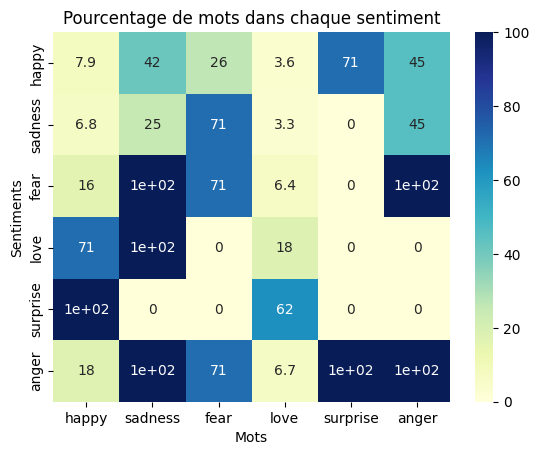

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des sentiments
sentiments = ['happy', 'sadness', 'fear', 'love', 'surprise', 'anger']  # Ajoutez tous les sentiments que vous souhaitez inclure

# Initialisation de la matrice
matrix = []

# Recherche du pourcentage de chaque sentiment contenant certains mots
for sentiment in sentiments:
    percentages = []
    for word in['happy', 'sadness', 'fear', 'love', 'surprise', 'anger']:  # Ajoutez tous les mots que vous souhaitez rechercher
        search_query = {
            "query": {
                "bool": {
                    "must": [
                        {"match": {"emotion": sentiment}},
                        {"match": {"text": word}}
                    ]
                }
            }
        }
        search_results = es.search(index="notes2", body=search_query)
        total_count = search_results["hits"]["total"]["value"]
        match_count = len(search_results["hits"]["hits"])

        # Vérification pour éviter la division par zéro
        percentage = 0
        if total_count != 0:
            percentage = match_count / total_count * 100

        percentages.append(percentage)
    
    matrix.append(percentages)

# Création de la HeatMap
heatmap_df = pd.DataFrame(matrix, columns=['happy', 'sadness', 'fear', 'love', 'surprise', 'anger'], index=sentiments)
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu")
plt.xlabel("Mots")
plt.ylabel("Sentiments")
plt.title("Pourcentage de mots dans chaque sentiment")
plt.show()


In [ ]:
stages_of_grief = ['denial', 'anger', 'bargaining', 'depression', 'acceptance']

# Recherche du nombre de textes correspondants pour chaque étape du deuil
for stage in stages_of_grief:
    # Recherche pleine
    full_text_query = {
        "query": {
            "match": {
                "text": stage
            }
        }
    }
    full_text_results = es.search(index="notes2", body=full_text_query)
    full_text_count = full_text_results["hits"]["total"]["value"]
    
    # Recherche fuzzy
    fuzzy_query = {
        "query": {
            "fuzzy": {
                "text": {
                    "value": stage,
                    "fuzziness": "AUTO"
                }
            }
        }
    }
    fuzzy_results = es.search(index="notes2", body=fuzzy_query)
    fuzzy_count = fuzzy_results["hits"]["total"]["value"]
    
    print(f"Stage: {stage}, Full Text Count: {full_text_count}, Fuzzy Count: {fuzzy_count}")


/tmp/ipykernel_54865/792079254.py:13: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  full_text_results = es.search(index="notes2", body=full_text_query)
/tmp/ipykernel_54865/792079254.py:13: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.17/security-minimal-setup.html to enable security.
  full_text_results = es.search(index="notes2", body=full_text_query)
/tmp/ipykernel_54865/792079254.py:27: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  fuzzy_results = es.search(index="notes2", body=fuzzy_query)
/tmp/ipykernel_54865/792079254.py:27: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could 

Stage: denial, Full Text Count: 7, Fuzzy Count: 177
Stage: anger, Full Text Count: 59, Fuzzy Count: 95
Stage: bargaining, Full Text Count: 0, Fuzzy Count: 0
Stage: depression, Full Text Count: 28, Fuzzy Count: 64
Stage: acceptance, Full Text Count: 21, Fuzzy Count: 121
